In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image


In [3]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/ml_5/dataset"

# Define image size and categories
img_size = (100, 100)  # Resize all images to 100x100
categories = os.listdir(dataset_path)  # Get gesture names

# Initialize lists for data and labels
data = []
labels = []

# Load images from each category folder
for idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = image.load_img(img_path, target_size=img_size, color_mode="rgb")
        img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
        data.append(img_array)
        labels.append(idx)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print("Data Loaded Successfully")
print(f"Total Samples: {len(data)}, Training: {len(X_train)}, Testing: {len(X_test)}")


Data Loaded Successfully
Total Samples: 2400, Training: 1920, Testing: 480


In [4]:
# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,550 (6.61 MB)

 Trainable params: 1,732,550 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7401 - loss: 0.7648 - val_accuracy: 0.9979 - val_loss: 0.0020
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 8.0821e-06
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 1.1009e-06
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.3593e-08
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 4.3336e-07
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.9371e-08
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 3.4769e-09
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 4.2778e-0

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.0039e-05
Test Accuracy: 1.00


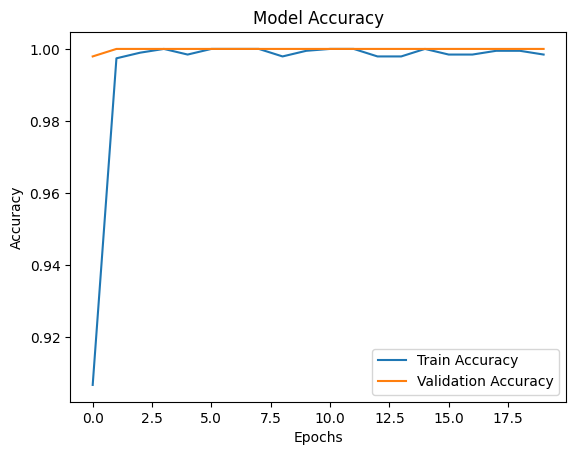

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


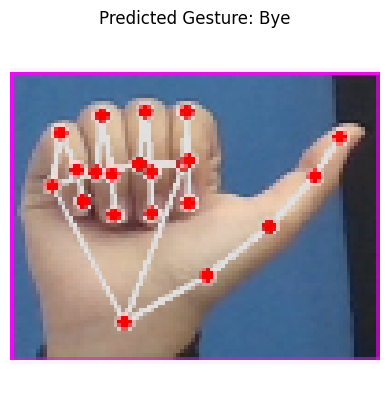

'Bye'

In [9]:
def predict_gesture(image_path, model, categories):
    img = image.load_img(image_path, target_size=img_size, color_mode="rgb")
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_label = categories[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted Gesture: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label

# Example usage
test_image_path = "/content/drive/MyDrive/ml_5/dataset/Bye/Image_1667239052.8485913.jpg"  # Replace with an actual test image path
predict_gesture(test_image_path, model, categories)
